In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

In [3]:
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/sh_files/'

In [4]:
folders = [f'split_number_{i}' for i in range(100)]

total = []
for files in folders:
    result = [i for i in os.listdir(files) if 'notadj_pvalues_full_genome' in i]
    total.append(result)

In [5]:
with open('splits_samples.pkl', 'rb') as file:
    # Load data from the file
    splits_samples = pickle.load(file)

In [6]:
## for bio1 and bio 12
#### so there is only one train-spli that left singificant q values at an fdr of 0.1 
#### at an fdr of 0.2 we see the same thing only 3 splits with significant values 
## with k=3 at fdr of 0.2 its even worst only 1 singificans split 


### the full genome?

In [7]:
import os

def find_files(directory, filename):
    """
    Search for files with a specific name within all subdirectories of a given directory.

    Parameters:
        directory (str): The root directory from which to start the search.
        filename (str): The name of the file to search for.

    Returns:
        list: A list of full paths to the files that match the given filename.
    """
    matches = []  # List to store the full paths of matching files
    for root, dirs, files in os.walk(directory):
        if filename in files:
            full_path = os.path.join(root, filename)
            matches.append(full_path)
    return matches

# Usage example
root_directory = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/'  # Update this to the directory you want to search
target_filename = 'notadj_qvalues_full_genome.csv'
notadj_qvalues_files = find_files(root_directory, target_filename)


In [8]:
## retrieve all no adjusted transposed pvalues
target_filename = 'wo_calibration_pvalue_full_genome.csv'
wo_calibration_pvalue = find_files(root_directory, target_filename)

for i in wo_calibration_pvalue:
    output_file_sign_snps = i.replace('wo_calibration_pvalue_full_genome.csv', 'significant_snps.pkl')
    print(i)
    print(output_file_sign_snps)
    pvalues = dd.read_csv(i)
    pvalues = pvalues.compute() 
    
    pvalues = pvalues.set_index(pvalues['Unnamed: 0'].astype(int))
    
    pvalues = pvalues.drop('Unnamed: 0', axis=1)
    significant_snps = {}

    # Iterate over each column in the transposed DataFrame
    for env_var in pvalues.columns:
        # Filter to find where q-value is < 0.10 for this environmental variable
        is_significant = pvalues[env_var] < 1.5453657571674064e-08
    
        # Get the list of SNP names where the q-value is < 0.10 for this environmental variable
        significant_snp_list = is_significant[is_significant].index.tolist()
    
        # Assuming SNP names are in the format 'Response Y12345', extract the numeric part, subtract 1, and convert to int
        #significant_index = pd.Series(significant_snp_list).str.replace('Response Y', '').astype(int) - 1
        #significant_index = significant_snp_list.tolist()
    
        # Store this list in the dictionary with the environmental variable as the key
        print(len(significant_snp_list))
        significant_snps[env_var] = significant_snp_list
    with open(output_file_sign_snps, 'wb') as f:
        pickle.dump(significant_snps, f)

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_82/wo_calibration_pvalue_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_82/significant_snps.pkl
2120
94
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_88/wo_calibration_pvalue_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_88/significant_snps.pkl
2204
0
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_66/wo_calibration_pvalue_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_66/significant_snps.pkl
864
8
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_11/wo_calibration_pvalue_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_11/significant_snps.pkl
1682
25
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_29/wo_calibration_pvalue_fu

In [12]:
# Example data for z-scores and genomic inflation factor
#zscore = zscores_bio1.copy()  # Random normal values as z-scores
#gif = 1.856250  # Default GIF from data

#new_gif = 1.5  # New chosen GIF

# Manual adjustment of the p-values
#adj_pv1 = 1 - chi2.cdf(zscore**2 / new_gif, df=1)

In [13]:
def qvalues_de():
    # Compute the result to bring it into memory (if necessary and feasible)
    filtered_df = filtered_df.compute()
    
    # Drop an unwanted column
    filtered_df = filtered_df.drop('Unnamed: 0', axis=1)
    
    #qvalues = pd.read_csv(output_file_qvalue).drop('Unnamed: 0',axis=1)
    filtered_df = qvalues < 0.1
    
    # Filtering to find where q-values are < 0.10
        # Dictionary to store results
    significant_snps = {}
    
    # Iterate over each row in the filtered DataFrame
    for env_var, is_significant in filtered_df.iterrows():
        # Get the list of SNP names where the q-value is < 0.10 for this environmental variable
        significant_snp_list = is_significant[is_significant].index.tolist()
        ## make it an actual index by substracting 0 and converting into int
        significant_index = pd.Series(significant_snp_list).str.replace('Response Y', '').astype(int) - 1
        significant_index = significant_index.tolist()
        # Store this list in the dictionary with the environmental variable as the key
        significant_snps[env_var] = significant_index
    return significant_snps

In [17]:
## retrieve all no adjusted transposed pvalues
target_filename = 'significant_snps.pkl'
significant_snps_files = find_files(root_directory, target_filename)

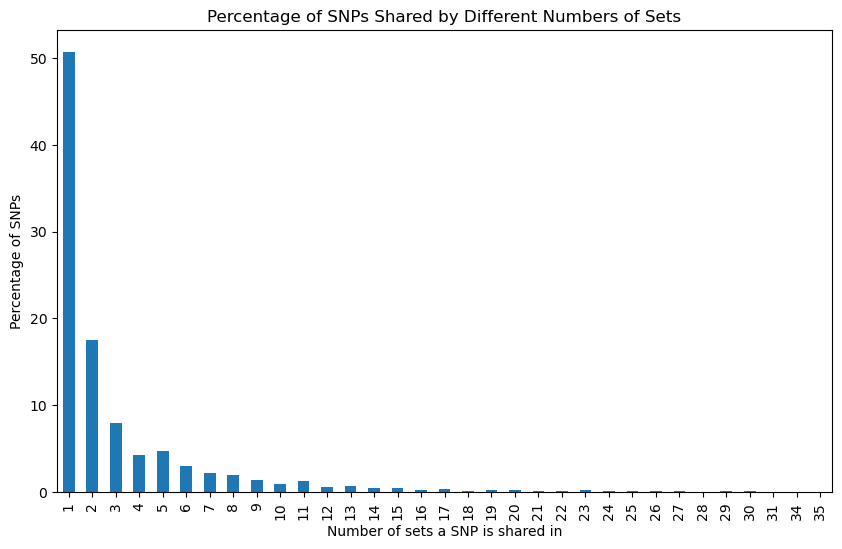

In [20]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to load data from a pickle file
def load_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return set(data['V1'])

# List of pickle files

# Dictionary to count the presence of each SNP across the sets
snp_count = defaultdict(int)

# Load data from each pickle file
for file in significant_snps_files[1:]:
    snps = load_data(file)
    for snp in snps:
        snp_count[snp] += 1

# Create a DataFrame to count SNPs by the number of sets they are shared in
shared_counts = pd.Series(snp_count.values()).value_counts().sort_index()

# Calculate the percentage of SNPs shared by different numbers of sets
total_snps = sum(shared_counts)
shared_percentage = (shared_counts / total_snps) * 100

# Plotting the bar chart
plt.figure(figsize=(10, 6))
shared_percentage.plot(kind='bar')
plt.xlabel('Number of sets a SNP is shared in')
plt.ylabel('Percentage of SNPs')
plt.title('Percentage of SNPs Shared by Different Numbers of Sets')
plt.show()

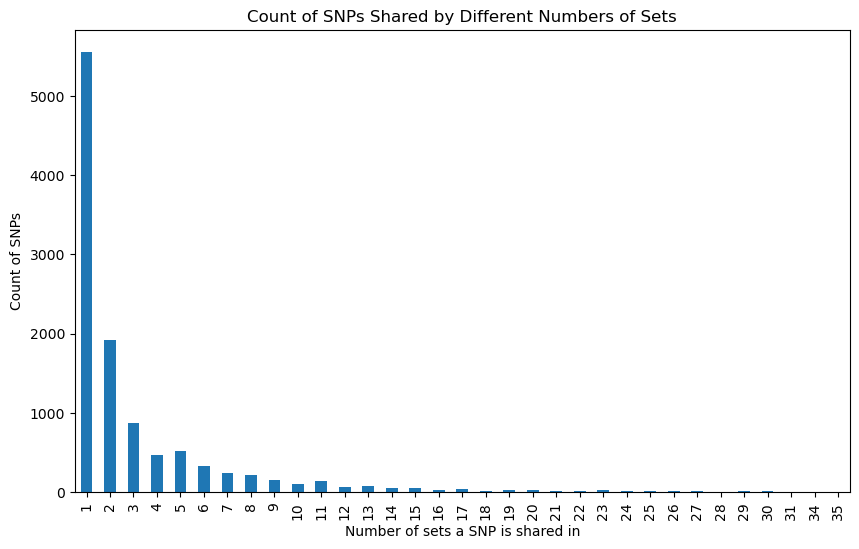

In [21]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to load data from a pickle file
def load_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return set(data['V1'])

# List of pickle files

# Dictionary to count the presence of each SNP across the sets
snp_count = defaultdict(int)

# Load data from each pickle file
for file in significant_snps_files[1:]:
    snps = load_data(file)
    for snp in snps:
        snp_count[snp] += 1

# Create a DataFrame to count SNPs by the number of sets they are shared in
shared_counts = pd.Series(snp_count.values()).value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
shared_counts.plot(kind='bar')
plt.xlabel('Number of sets a SNP is shared in')
plt.ylabel('Count of SNPs')
plt.title('Count of SNPs Shared by Different Numbers of Sets')
plt.show()


In [32]:
import numpy as np
from collections import defaultdict

In [35]:
## create a null distribution 
amount = []
for file in significant_snps_files[1:]:
    snps = load_data(file)
    amount.append((len(snps)))
sample_sizes = amount

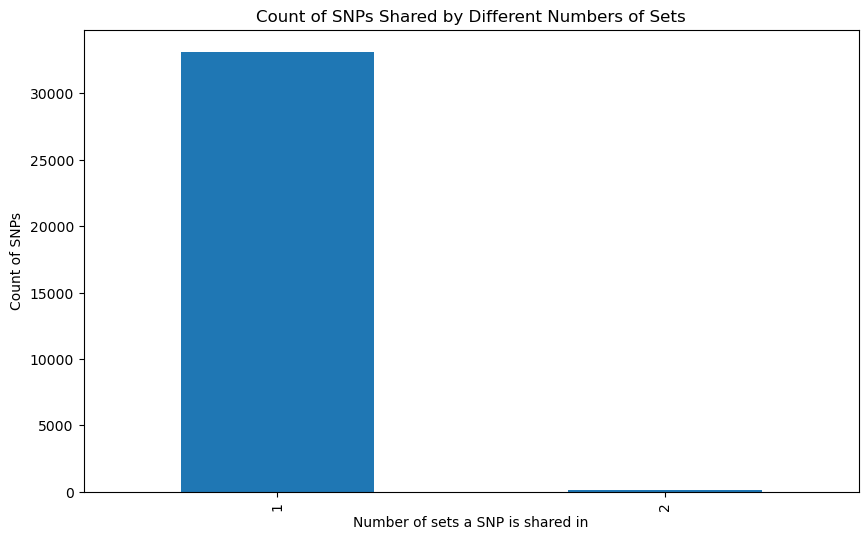

In [36]:
# Define the maximum SNP index
max_snp_index = 3300000

# Dictionary to count the presence of each SNP across the sets
snp_count = defaultdict(int)

# Generate random samples for each size and count the SNPs
random_samples = []
for size in sample_sizes:
    sample = np.random.choice(range(1, max_snp_index + 1), size, replace=False)
    random_samples.append(sample)
    for snp in sample:
        snp_count[snp] += 1

# Create a DataFrame to count SNPs by the number of sets they are shared in
shared_counts = pd.Series(list(snp_count.values())).value_counts().sort_index()

# Plotting the distribution of SNP sharing
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
shared_counts.plot(kind='bar')
plt.xlabel('Number of sets a SNP is shared in')
plt.ylabel('Count of SNPs')
plt.title('Count of SNPs Shared by Different Numbers of Sets')
plt.show()


In [14]:
## Transpose
#import csv
#def transpose(input, output):
#    a = zip(*csv.reader(open(input, "rt")))
#    csv.writer(open(output, "wt")).writerows(a)

## transpose all the pvalues files
#for i in pd.Series(wo_calibration_pvalue).sort_values()[-4:]:
#    j = i.replace('wo_calibration_pvalue_full_genome', 'tr_wo_calibration_pvalue_full_genome')
#    print(i)
#    print(j)
#    transpose(i, j)
#    print('done')

In [177]:
target_filename = 'significant_snps.pkl'
significant_snps_files = find_files(root_directory, target_filename)

In [178]:
significant_snps_files

['/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_88/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_11/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_29/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_54/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_75/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_8/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_2/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_30/significant_snps.pkl',
 '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_47/s

In [ ]:
## compare the gif with 3 k and the other number
### runn all the transpositions 
## calculate singifant allees 

In [161]:
#alljobs = [int(i.split('_')[2].replace('.out', '')) for i in os.listdir() if '.out' in i]

In [40]:
test_samples = splits_samples[0][1]

In [41]:
#### training 

path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

allele_freq = dd.read_csv(path_ldp_af, sep = '\t', usecols=train_samples)

clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

sites_af = pd.Series(allele_freq.columns.str.split('_').str[0]).astype(int)

sites_af.name = 'site'

env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

##scale it
means = {}
stds = {}
for i in env.columns[1:]:
    means[i] = np.mean(env[i])
    stds[i] = np.std(env[i])
    env[i] = (env[i] - np.mean(env[i])) / np.std(env[i])

env = env.drop('site',axis=1)

#env.to_csv(f'split_number_{number}/environment_lea.csv', sep = ',', index=False)


In [42]:
path_ldp_af = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_allele_frequency_LDpruned.txt'

allele_freq = dd.read_csv(path_ldp_af, sep = '\t', usecols=test_samples)

clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

sites_af = pd.Series(allele_freq.columns.str.split('_').str[0]).astype(int)

sites_af = sites_af.drop_duplicates()

sites_af.name = 'site'

env_test = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

##scale it for the testing we used the saved mean and std
for i in env_test.columns[1:]:
    env_test[i] = (env_test[i] - means[i]) / stds[i]

#env = env.drop('site',axis=1)
#env.to_csv(f'split_number_{number}/environment_lea.csv', sep = ',', index=False)



In [43]:
env_test['site'].to_list()

[4, 24, 48, 52, 55, 57]

In [1]:
## get the vcf file frothe chromosomes and positions 
import allel
## ld pruned vcf file
ld_prunned_vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1_LDpruned.recode.vcf'
ld_prunned_vcf = allel.read_vcf(ld_prunned_vcf_file)

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ld_prunned_chrom = ld_prunned_vcf['variants/CHROM']
ld_prunned_pos = ld_prunned_vcf['variants/POS']

In [3]:
index_pos = {}
for index, pos in enumerate(ld_prunned_pos):
    index_pos[index] = pos

In [4]:
real_positions = []
for i in matrix_results.index:
    real_pos = index_pos[i]
    real_positions.append(real_pos)

NameError: name 'matrix_results' is not defined

In [ ]:
#matrix_results.index = real_positions

In [57]:
ld_prunned_vcf['calldata/GT'].shape

(13985, 231, 2)

In [9]:
ld_prunned_vcf

NameError: name 'ld_prunned_vcf' is not defined

In [58]:
len(matrix_results.index)

19

In [59]:
selected_snps = ld_prunned_vcf['calldata/GT'][matrix_results.index, :, :]

In [60]:
selected_snps.shape

(19, 231, 2)

In [61]:
genotype_counts = np.sum(selected_snps, axis=2)

In [62]:
genotype_counts.shape

(19, 231)

In [63]:
genotype_counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [2, 0, 0, ..., 0, 0, 2]])

In [64]:
len(ld_prunned_pos)

13985

In [3]:
import sys
sys.path.append('/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages')
import cvxpy

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import numpy as np
import cvxpy as cp

y = np.asarray(matrix_results[4]) * 2


h = cp.Variable(231)

product = genotype_counts @ h 

diff = product - y

constraints = [0 <= h, sum(h) == 1]


problem = cp.Problem(cp.Minimize(cp.norm(diff)), constraints)

# Solve the optimization problem using the SCS solver, with verbose output disabled.
problem.solve(solver='SCS', verbose=False)


h.value.shape

ecotype_frequency = h.value

In [ ]:


# `y` represents the haplotype frequency, for me the allele frequency 
## i?? take it away  this is because you do it per haplotype block?? 
## 
y = np.asarray(independent_block_haplotype_frequency[i]) * 2

# Create a variable `h` using CVXPY, which represents the frequencies of ecotypes??.
# Its dimension is set to match 231?? 
h = cp.Variable(haplotype.shape[0])

# `product` computes the dot product of the transpose of the haplotype design matrix with the vector `h`.
# for me the haplotype sedign matrix is gonna be the genotype matrix??? 
product = independent_haplotype_DM_.T @ h 

# Calculate the residuals `diff` by subtracting the observed frequencies `y` from the modeled `product`.
diff = product - y

# Define constraints for the optimization problem:
# 1. All elements of `h` must be non-negative.
# 2. The sum of all elements in `h` must equal 1 (ensuring that `h` represents a probability distribution).
constraints = [0 <= h, sum(h) == 1]

# Formulate the optimization problem:
# The objective is to minimize the norm of the residuals `diff`.
# This norm minimization helps in fitting the model close to the observed data.
problem = cp.Problem(cp.Minimize(cp.norm(diff)), constraints)

# Solve the optimization problem using the SCS solver, with verbose output disabled.
problem.solve(solver='SCS', verbose=False)

# Store the solution of `h` (the estimated haplotype frequencies) in `ecotype_frequency` at index `i`.
## for you it was an index becasue it was at haplotype block i ???? 
ecotype_frequency[i, :] = h.value

# `weights` is a list that stores the distance between variants to perhaps weigh the influence of each segment.
# Here, it appends the distance between the right and left variant positions.
weights.append(variant_positions[right] - variant_positions[left])

In [45]:
import csv

In [46]:
## function to fin diles 
def find_files(directory, filename):
    matches = []  # List to store the full paths of matching files
    for root, dirs, files in os.walk(directory):
        if filename in files:
            full_path = os.path.join(root, filename)
            matches.append(full_path)
    return matches

## generate transpose function 
def transpose(input, output):
    a = zip(*csv.reader(open(input, "rt")))
    csv.writer(open(output, "wt")).writerows(a)

In [22]:
root_directory = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/'  # Update this to the directory you want to search

## retrieve all no adjusted qvalues
target_filename = 'notadj_qvalues_full_genome.csv'
notadj_qvalues_files = find_files(root_directory, target_filename)

## retrieve all no adjusted pvalues
target_filename = 'notadj_pvalues_full_genome.csv'
notadj_pvalues_files = find_files(root_directory, target_filename)


In [42]:
pd.Series(notadj_pvalues_files).sort_values()[-4:]

17    /carnegie/nobackup/scratch/tbellagio/gea_grene...
59    /carnegie/nobackup/scratch/tbellagio/gea_grene...
34    /carnegie/nobackup/scratch/tbellagio/gea_grene...
89    /carnegie/nobackup/scratch/tbellagio/gea_grene...
dtype: object

In [39]:
for i in pd.Series(notadj_pvalues_files).sort_values():
    print(i)

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_0/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_1/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_10/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_11/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_12/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_13/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_14/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_15/notadj_pvalues_full_genome.csv
/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_16/notadj_pvalues_full_genome.csv
/carnegie/no